In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.shape

(1728, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
Counter(data.outcome)

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

In [7]:
data['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [8]:
data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
data['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [10]:
data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [11]:
X = data.iloc[:,:-1]
y = data.outcome
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [12]:
enc = LabelEncoder()
X.buying = enc.fit_transform(X.buying)
X.maint = enc.fit_transform(X.maint)
X.lug_boot = enc.fit_transform(X.lug_boot)
X.safety = enc.fit_transform(X.safety)
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2
5,3,3,2,2,1,0
6,3,3,2,2,0,1
7,3,3,2,2,0,2
8,3,3,2,2,0,0
9,3,3,2,4,2,1


In [13]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
model_knn = KNeighborsClassifier()#n_neighbors=7,metric='euclidean'
model_knn.fit(X_train,y_train)
y_predict = model_knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.9566473988439307

In [16]:
model_svm = SVC() #C=10,gamma=0.1,kernel='rbf'
model_svm.fit(X_train,y_train)
y_predict = model_svm.predict(X_test)
accuracy_score(y_test,y_predict)

0.8236994219653179

In [17]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_predict = model_dt.predict(X_test)
accuracy_score(y_test,y_predict)

0.9826589595375722

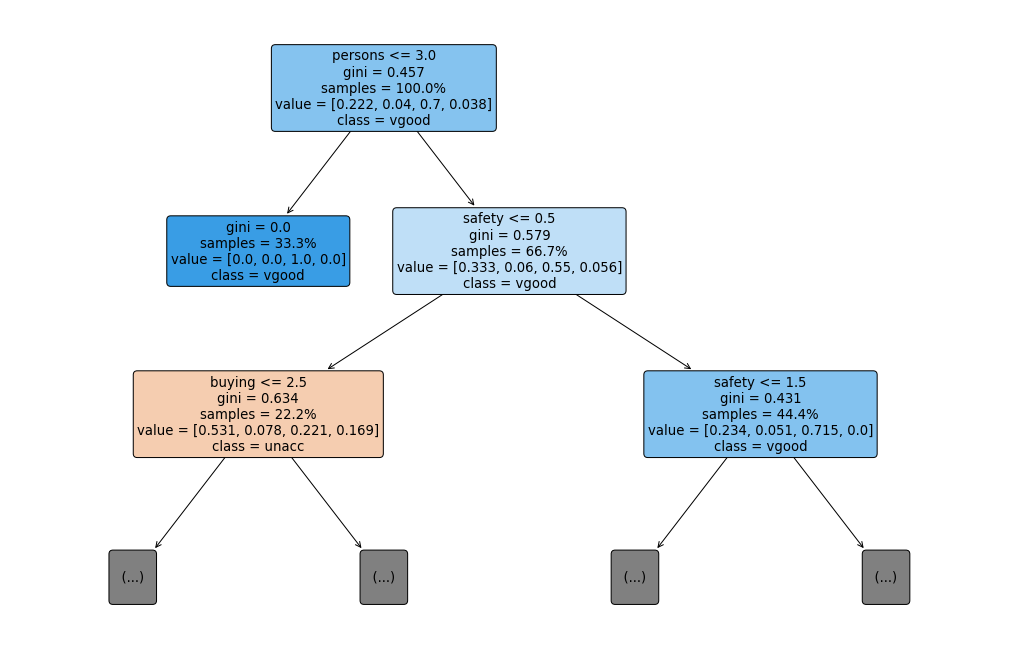

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import tree
rcParams['figure.figsize']=18,12
dtc=tree.DecisionTreeClassifier(random_state=10)
dtc=dtc.fit(X,y)
tree.plot_tree(dtc,
               class_names=['unacc', 'acc', 'vgood', 'good'],
              filled=True,
              rounded=True,
               proportion=True,
              feature_names=['buying','maint','doors','persons','lug_boot','safety'],max_depth=2)
plt.show()

In [19]:
model_rf = RandomForestClassifier()#n_estimators=110,random_state=10
model_rf.fit(X_train,y_train)
y_predict = model_rf.predict(X_test)
accuracy_score(y_test,y_predict)

0.9942196531791907

In [20]:
model_xgb = XGBClassifier() #learning_rate=0.1,n_estimators=250,random_state=5
model_xgb.fit(X_train,y_train)
y_predict = model_xgb.predict(X_test)
accuracy_score(y_test,y_predict)

0.9913294797687862

In [28]:
! pip install XGBoost